In [1]:
# Configurações de visualização
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Importação das Bibliotecas

# Manipulação
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualização
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import lightgbm as ltb


from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import pickle

# Configurações de visualização do dataset
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [2]:
# Carregamento dos dados em arquivo xlsx
df = pd.read_excel('Data_Train.xlsx')

In [3]:
# Colunas
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Renomeação das colunas:

In [4]:
# Renomeação das colunas 
df.columns = ['linha', 'data_voo', 'origem', 'destino', 'rota', 'partida',
              'chegada', 'duracao', 'paradas', 'informacoes', 'preco']

# 1. Análise Exploratória 

In [5]:
# Visualização do DataFrame
df.sample(5)

,linha,data_voo,origem,destino,rota,partida,chegada,duracao,paradas,informacoes,preco
7103,Air India,6/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
4812,IndiGo,18/03/2019,Banglore,New Delhi,BLR → HYD → DEL,16:55,21:50,4h 55m,1 stop,No info,4049
4001,Air India,1/04/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,5562
5365,Jet Airways,21/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 22 May,13h 30m,2 stops,No info,15129
10642,Air India,21/05/2019,Kolkata,Banglore,CCU → JAI → BOM → BLR,08:20,11:10 22 May,26h 50m,2 stops,No info,11222


In [6]:
# Tamanho do Dataset
df.shape

(10683, 11)

In [7]:
# Tipos de dados do Dataset
df.dtypes

linha          object
data_voo       object
origem         object
destino        object
rota           object
partida        object
chegada        object
duracao        object
paradas        object
informacoes    object
preco           int64
dtype: object

In [8]:
# Frequência dos tipos de dados
df.dtypes.value_counts()

object    10
int64      1
dtype: int64

In [9]:
# Valores únicos em cada coluna
df.nunique()

linha            12
data_voo         44
origem            5
destino           6
rota            128
partida         222
chegada        1343
duracao         368
paradas           5
informacoes      10
preco          1870
dtype: int64

In [10]:
# Campos duplicados
df.duplicated().sum()

220

In [11]:
# Descrição estatística de todo o Dataset incluindo colunas categóricas
df.describe(include=['O']).T

,count,unique,top,freq
linha,10683,12,Jet Airways,3849
data_voo,10683,44,18/05/2019,504
origem,10683,5,Delhi,4537
destino,10683,6,Cochin,4537
rota,10682,128,DEL → BOM → COK,2376
partida,10683,222,18:55,233
chegada,10683,1343,19:00,423
duracao,10683,368,2h 50m,550
paradas,10682,5,1 stop,5625
informacoes,10683,10,No info,8345


In [12]:
# Descrição estatística somente das colunas númericas do Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preco,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [13]:
# Valores nulos no Dataset
df.isnull().sum().sort_values(ascending=False)

rota           1
paradas        1
linha          0
data_voo       0
origem         0
destino        0
partida        0
chegada        0
duracao        0
informacoes    0
preco          0
dtype: int64

In [14]:
# Valores únicos em cada coluna
df.nunique()

linha            12
data_voo         44
origem            5
destino           6
rota            128
partida         222
chegada        1343
duracao         368
paradas           5
informacoes      10
preco          1870
dtype: int64

In [15]:
# Listando colunas categóricas e numéricas:
v_c = list(df.select_dtypes(include=['object']).columns)
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('Variáveis Categóricas:', v_c)
print('Variáveis Númericas:', v_n)

Variáveis Categóricas: ['linha', 'data_voo', 'origem', 'destino', 'rota', 'partida', 'chegada', 'duracao', 'paradas', 'informacoes']
Variáveis Númericas: ['preco']


In [16]:
# Contagem dos valores das colunas categóricas
colucat = df.select_dtypes(include = 'object').columns
for i in range(0, len(colucat)):
    print(df[colucat[i]].value_counts())
    print('_____________________________\n')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: linha, dtype: int64
_____________________________

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2

In [17]:
# Contagem dos valores das colunas numéricas
colunum = df.select_dtypes(include =['float64', 'int64']).columns
for i in range(0, len(colunum)):
    print(df[colunum[i]].value_counts())
    print('_____________________________\n')

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
9663      84
14781     84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
8016      60
6442      60
3100      58
14571     57
13941     57
11087     57
13014     57
2754      56
4423      53
4544      51
4668      49
13377     49
14388     49
7832      47
3543      45
8372      43
3419      43
13587     42
13067     42
7480      41
2227      40
7064      40
13376     39
8040      39
9646      38
4049      38
6961      37
15554     36
1965      36
13292     36
16079     36
4995      35
2017      35
13817     35
4878      34
13029     33
5228      32
4148      32
3383      31
14871     31
6093      30
12692     30
11467     29
4409      29
5403      29
4030      29
4591      29
3625      29
5192      28
8452      28
6795      27
6144      27
8610      27
13727     26
7408      26
8529      26
6216      25

Column: Preço

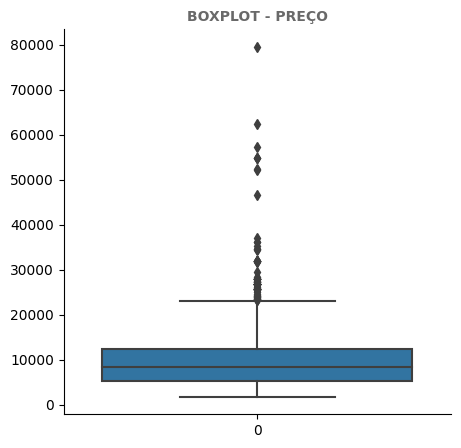

In [18]:
# Boxplot

#Plot
plt.figure(figsize=(5,5))
sns.boxplot(df['preco'])
sns.despine()
plt.title('BOXPLOT - PREÇO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.show();

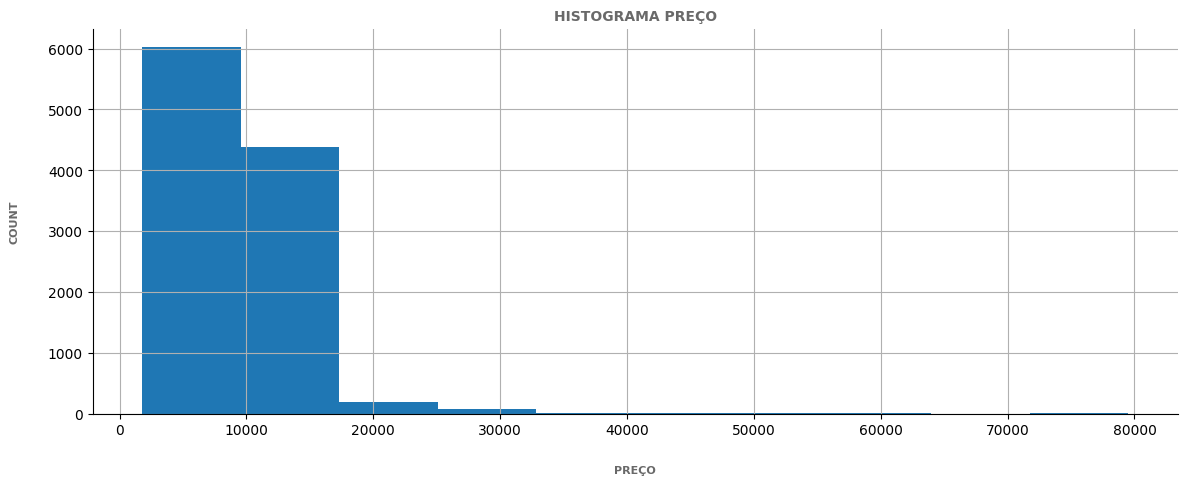

In [19]:
# Gráfico Histograma

#Plot
plt.figure(figsize = (14,5))
df['preco'].hist()
sns.despine()
plt.title('HISTOGRAMA PREÇO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8);

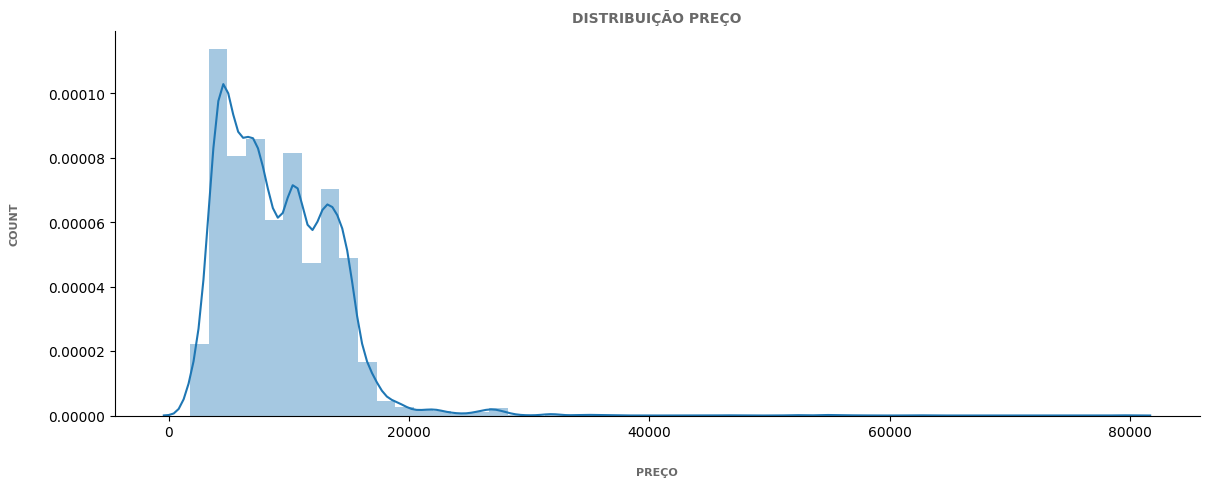

In [20]:
# Distribuição

#Plot
plt.figure(figsize = (14,5))
sns.distplot(df['preco'])
sns.despine()
plt.title('DISTRIBUIÇÃO PREÇO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 8);

Coluna: Linhas Aéreas

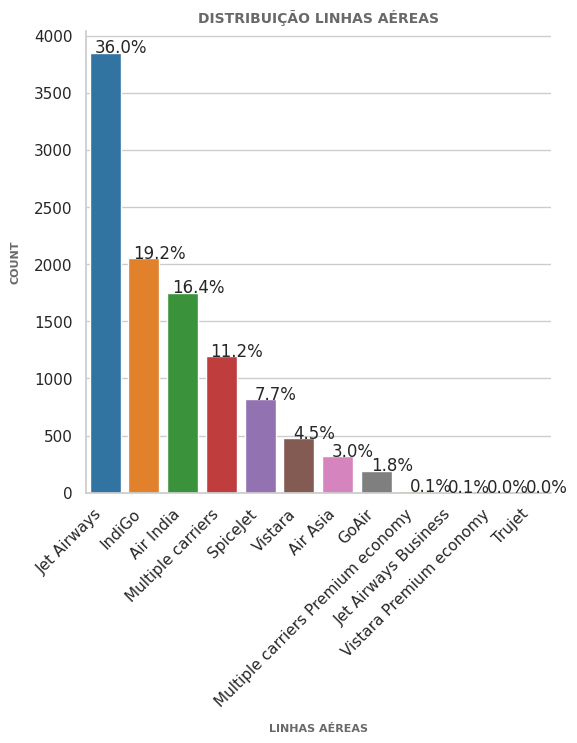

In [21]:
# Gráfico de Distribuição

#Plot
sns.set(style='whitegrid')
plt.figure(figsize=(6,6))

total = float(df.shape[0])

ax = sns.countplot(x='linha', data=df, palette='tab10', order = df['linha'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO LINHAS AÉREAS', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('LINHAS AÉREAS', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8);
plt.xticks(rotation=45, ha='right')
plt.show()

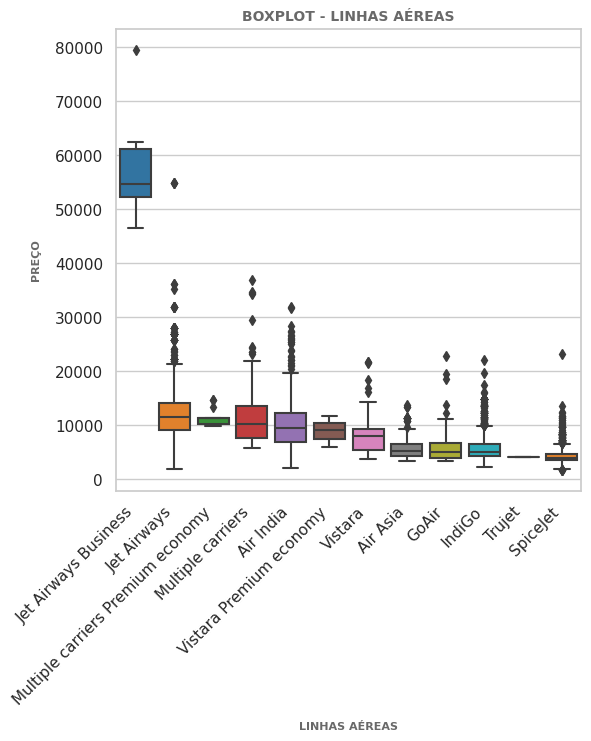

In [22]:
# Boxplot

#Plot
plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='linha', y='preco', palette = 'tab10', order = df.groupby(['linha'])['preco'].median().sort_values(ascending=False).index)
plt.title('BOXPLOT - LINHAS AÉREAS', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LINHAS AÉREAS', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.ylabel('PREÇO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 8)
plt.xticks(rotation=45, ha='right')
plt.show();

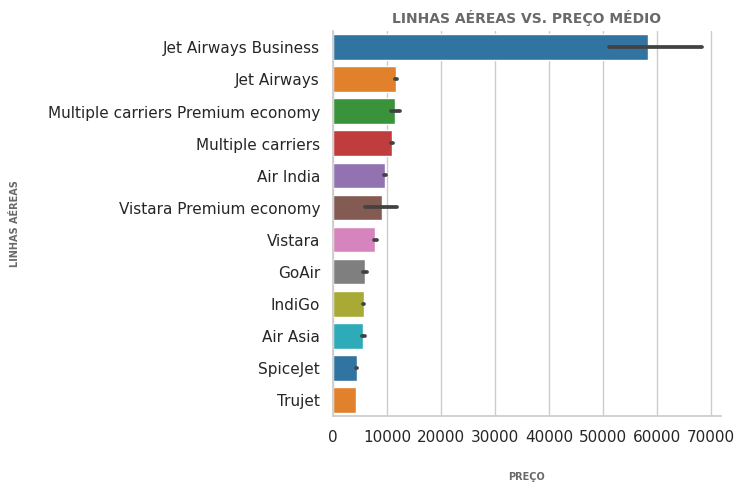

In [23]:
# Gráfico Preço Médio

#Plot
plt.figure(figsize = (5,5))
sns.barplot(x = 'preco', y = 'linha', orient = 'h', data=df, palette = 'tab10', order = df.groupby(['linha'])['preco'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('LINHAS AÉREAS VS. PREÇO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('LINHAS AÉREAS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Coluna: Origem do Voo

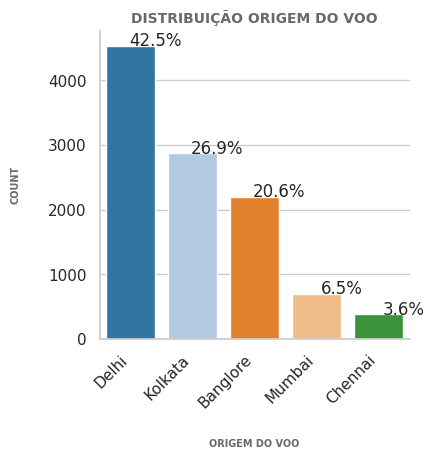

In [24]:
# Gráfico de Distribuição

#Plot
sns.set(style='whitegrid')
plt.figure(figsize=(4,4))

total = float(df.shape[0])

ax = sns.countplot(x='origem', data=df, palette='tab20', order = df['origem'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO ORIGEM DO VOO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('ORIGEM DO VOO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

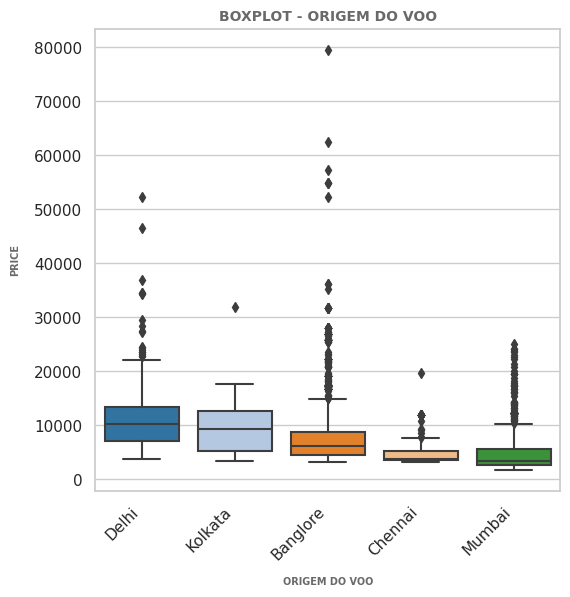

In [25]:
# Boxplot

#Plot
plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='origem', y='preco', palette = 'tab20', order = df.groupby(['origem'])['preco'].median().sort_values(ascending=False).index)
plt.title('BOXPLOT - ORIGEM DO VOO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('ORIGEM DO VOO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('PRICE', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.xticks(rotation=45, ha='right')
plt.show();

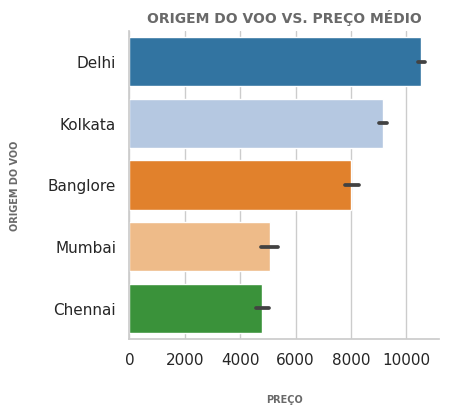

In [26]:
# Gráfico Preço Médio

#Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'preco', y = 'origem', orient = 'h', data=df, palette = 'tab20', order = df.groupby(['origem'])['preco'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('ORIGEM DO VOO VS. PREÇO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('ORIGEM DO VOO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Coluna: Destino do Voo

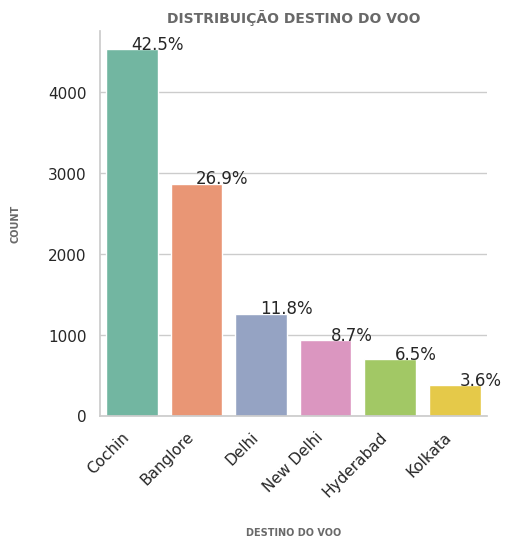

In [27]:
# Gráfico de Distribuição

#Plot
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))

total = float(df.shape[0])

ax = sns.countplot(x='destino', data=df, palette='Set2', order = df['destino'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO DESTINO DO VOO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('DESTINO DO VOO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

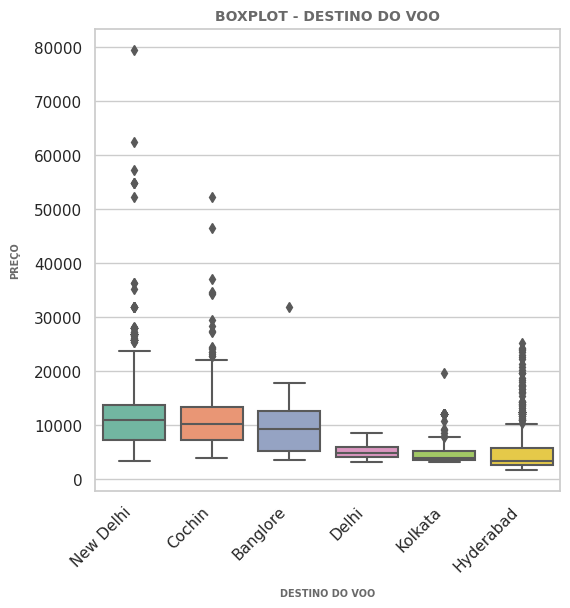

In [28]:
# Boxplot

#Plot
plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='destino', y='preco', palette = 'Set2', order = df.groupby(['destino'])['preco'].median().sort_values(ascending=False).index)
plt.title('BOXPLOT - DESTINO DO VOO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('DESTINO DO VOO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('PREÇO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.xticks(rotation=45, ha='right')
plt.show();

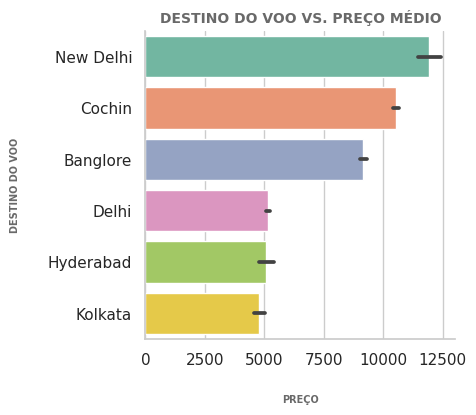

In [29]:
# Gráfico Preço Médio

#Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'preco', y = 'destino', orient = 'h', data=df, palette = 'Set2', order = df.groupby(['destino'])['preco'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('DESTINO DO VOO VS. PREÇO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('DESTINO DO VOO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Coluna: Paradas

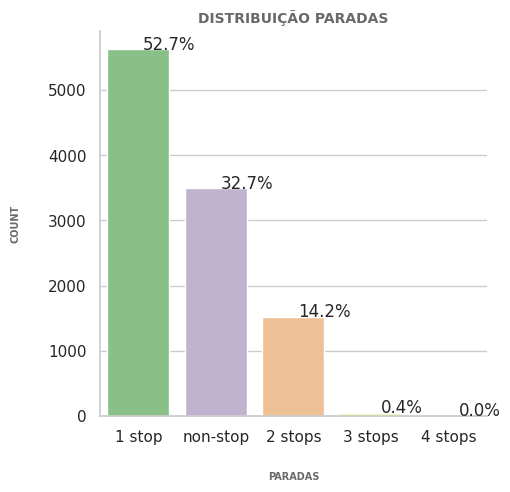

In [30]:
# Gráfico de Distribuição

#Plot
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))

total = float(df.shape[0])

ax = sns.countplot(x='paradas', data=df, palette='Accent', order = df['paradas'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO PARADAS', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('PARADAS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

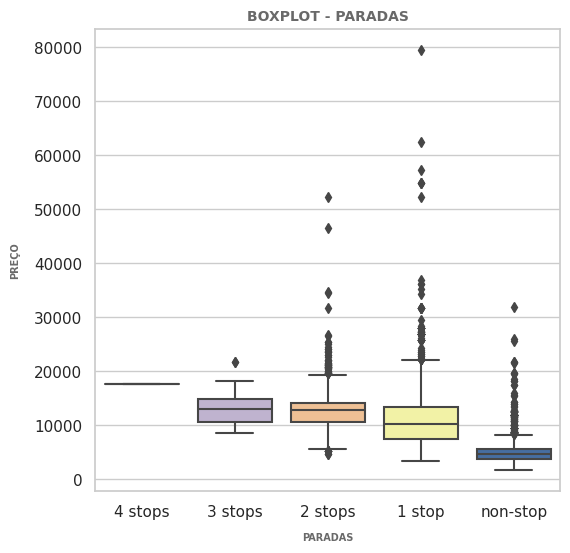

In [31]:
# Boxplot

#Plot
plt.figure(figsize = (6,6))
sns.boxplot(data=df, x='paradas', y='preco', palette = 'Accent', order = df.groupby(['paradas'])['preco'].median().sort_values(ascending=False).index)
plt.title('BOXPLOT - PARADAS', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PARADAS', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('PREÇO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.show();

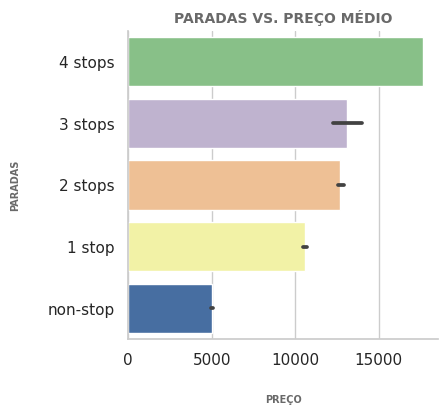

In [32]:
# Gráfico Preço Médio

#Plot
plt.figure(figsize = (4,4))
sns.barplot(x = 'preco', y = 'paradas', orient = 'h', data=df, palette = 'Accent', order = df.groupby(['paradas'])['preco'].mean().sort_values(ascending=False).index)
sns.despine()
plt.title('PARADAS VS. PREÇO MÉDIO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('PREÇO', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7)
plt.ylabel('PARADAS', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.show()

Coluna: Informações

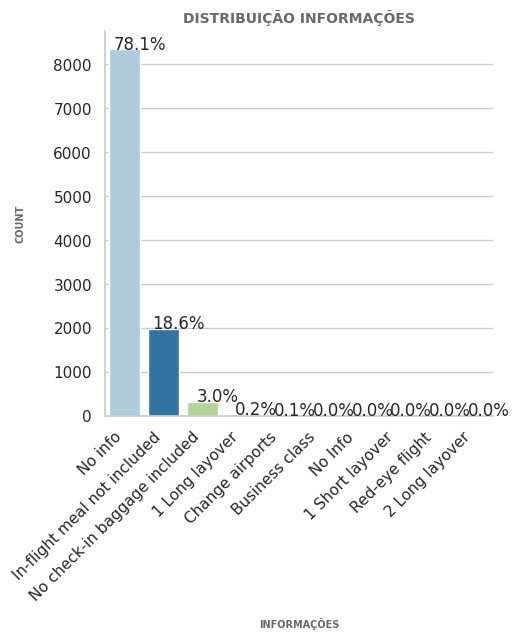

In [33]:
# Gráfico de Distribuição

#Plot
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))

total = float(df.shape[0])

ax = sns.countplot(x='informacoes', data=df, palette='Paired', order = df['informacoes'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO INFORMAÇÕES', fontsize = 10, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('INFORMAÇÕES', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', labelpad = 20, fontweight = 'bold', fontsize = 7);
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Pré-processamento

**2.1 - Exclusão de campos duplicados**

In [34]:
# Exclusão de campos duplicados
df.drop_duplicates(inplace = True)

In [35]:
# Verificar campos duplicados
df.duplicated().sum()

0

**2.2 - Exclusão de valores nulos**

In [36]:
# Exclusão de valores nulos
df.dropna(inplace = True)

In [37]:
# Verificar valores nulos no Dataset
df.isnull().sum().sort_values(ascending=False)

linha          0
data_voo       0
origem         0
destino        0
rota           0
partida        0
chegada        0
duracao        0
paradas        0
informacoes    0
preco          0
dtype: int64

**2.3 - Engenharia de Atributos**

Coluna: Data do Voo

In [38]:
# Transformações na Data
df['data_voo'] = pd.to_datetime(df['data_voo'])
df['ano_voo'] = df['data_voo'].dt.year
df['mes_voo'] = df['data_voo'].dt.month
df['dia_voo'] = df['data_voo'].dt.day
df.drop(columns=['data_voo'], inplace=True)

In [39]:
df['ano_voo'].value_counts()

2019    10462
Name: ano_voo, dtype: int64

In [40]:
df['ano_voo'].nunique()

1

**OBS:** Como todas as viagens foram feitas no ano de 2019, podemos excluir esta variável pois ela não é relevante para a elaboração do modelo.

In [41]:
df.drop(columns=['ano_voo'], inplace=True)

Coluna: Rota

**OBS:** Vamos excluir esta variável pois as variáveis origem e destino dispoẽm a mesma informação.

In [42]:
df.drop(['rota'], axis = 1, inplace = True)

Coluna: Partida

In [43]:
df['hora_partida'] = pd.to_datetime(df['partida']).dt.hour
df['min_partida'] = pd.to_datetime(df['partida']).dt.minute
df.drop(['partida'], axis = 1, inplace = True)

Coluna: Paradas

In [44]:
df['paradas'] = df['paradas'].str.replace('non-stop','0')
df['paradas'] = df['paradas'].str.replace('stops','')
df['paradas'] = df['paradas'].str.replace('stop','')
df['paradas'] = df['paradas'].astype(int)

Coluna: Duração

In [45]:
df['horas_total_duracao'] = df['duracao'].str.replace('h', '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
df.drop(columns=['duracao'], inplace=True)

Coluna: Chegada

In [46]:
df['hora_chegada'] = pd.to_datetime(df['chegada']).dt.hour
df['min_chegada'] = pd.to_datetime(df['chegada']).dt.minute
df.drop(['chegada'], axis = 1, inplace = True)

Coluna: Informações

**OBS:** Podemos excluir esta variável haja vista que não apresenta informações relevantes para a elaboração do modelo de acordo com análise exploratória que foi feita

In [47]:
df.drop(['informacoes'], axis = 1, inplace = True)

In [48]:
df.head()

,linha,origem,destino,paradas,preco,mes_voo,dia_voo,hora_partida,min_partida,horas_total_duracao,hora_chegada,min_chegada
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,2.833333,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7.416667,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,19.000000,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5.416667,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4.750000,21,35


In [49]:
df.shape

(10462, 12)

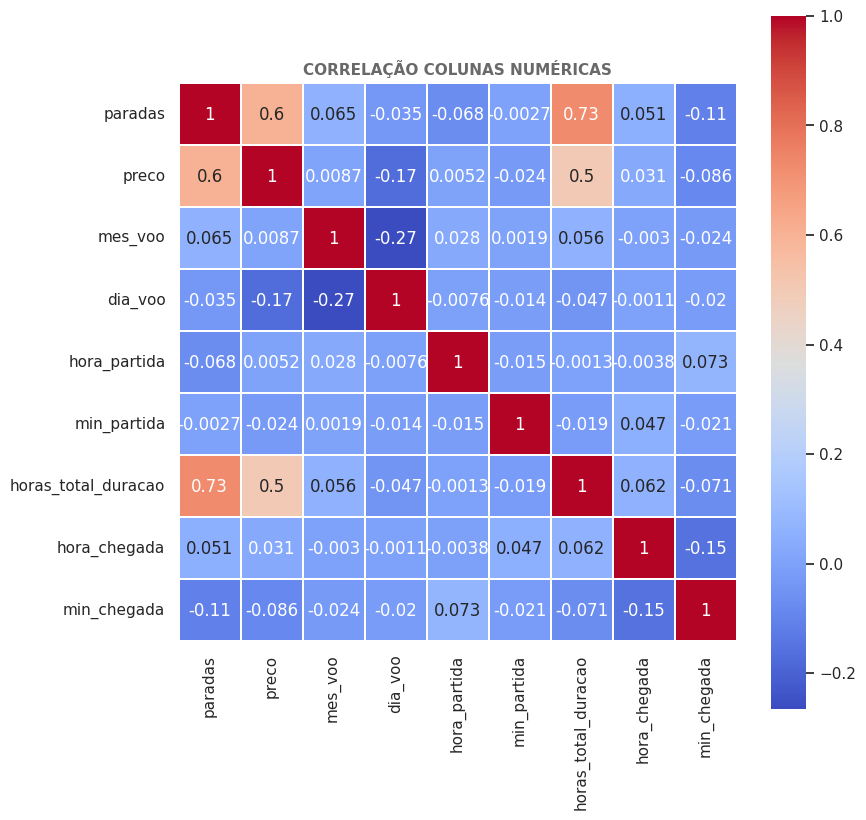

In [50]:
# Correlação entre as colunas
plt.figure(figsize=(9,9)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize = 11, color ='dimgrey', fontweight = 'bold')
plt.show();

A partir do gráfico de correlação podemos identificar relações fortes entre: paradas e horas_total_duracao. Talvez seja necessário eliminar uma das duas, haja vista que ambas possuem informações muito similares.

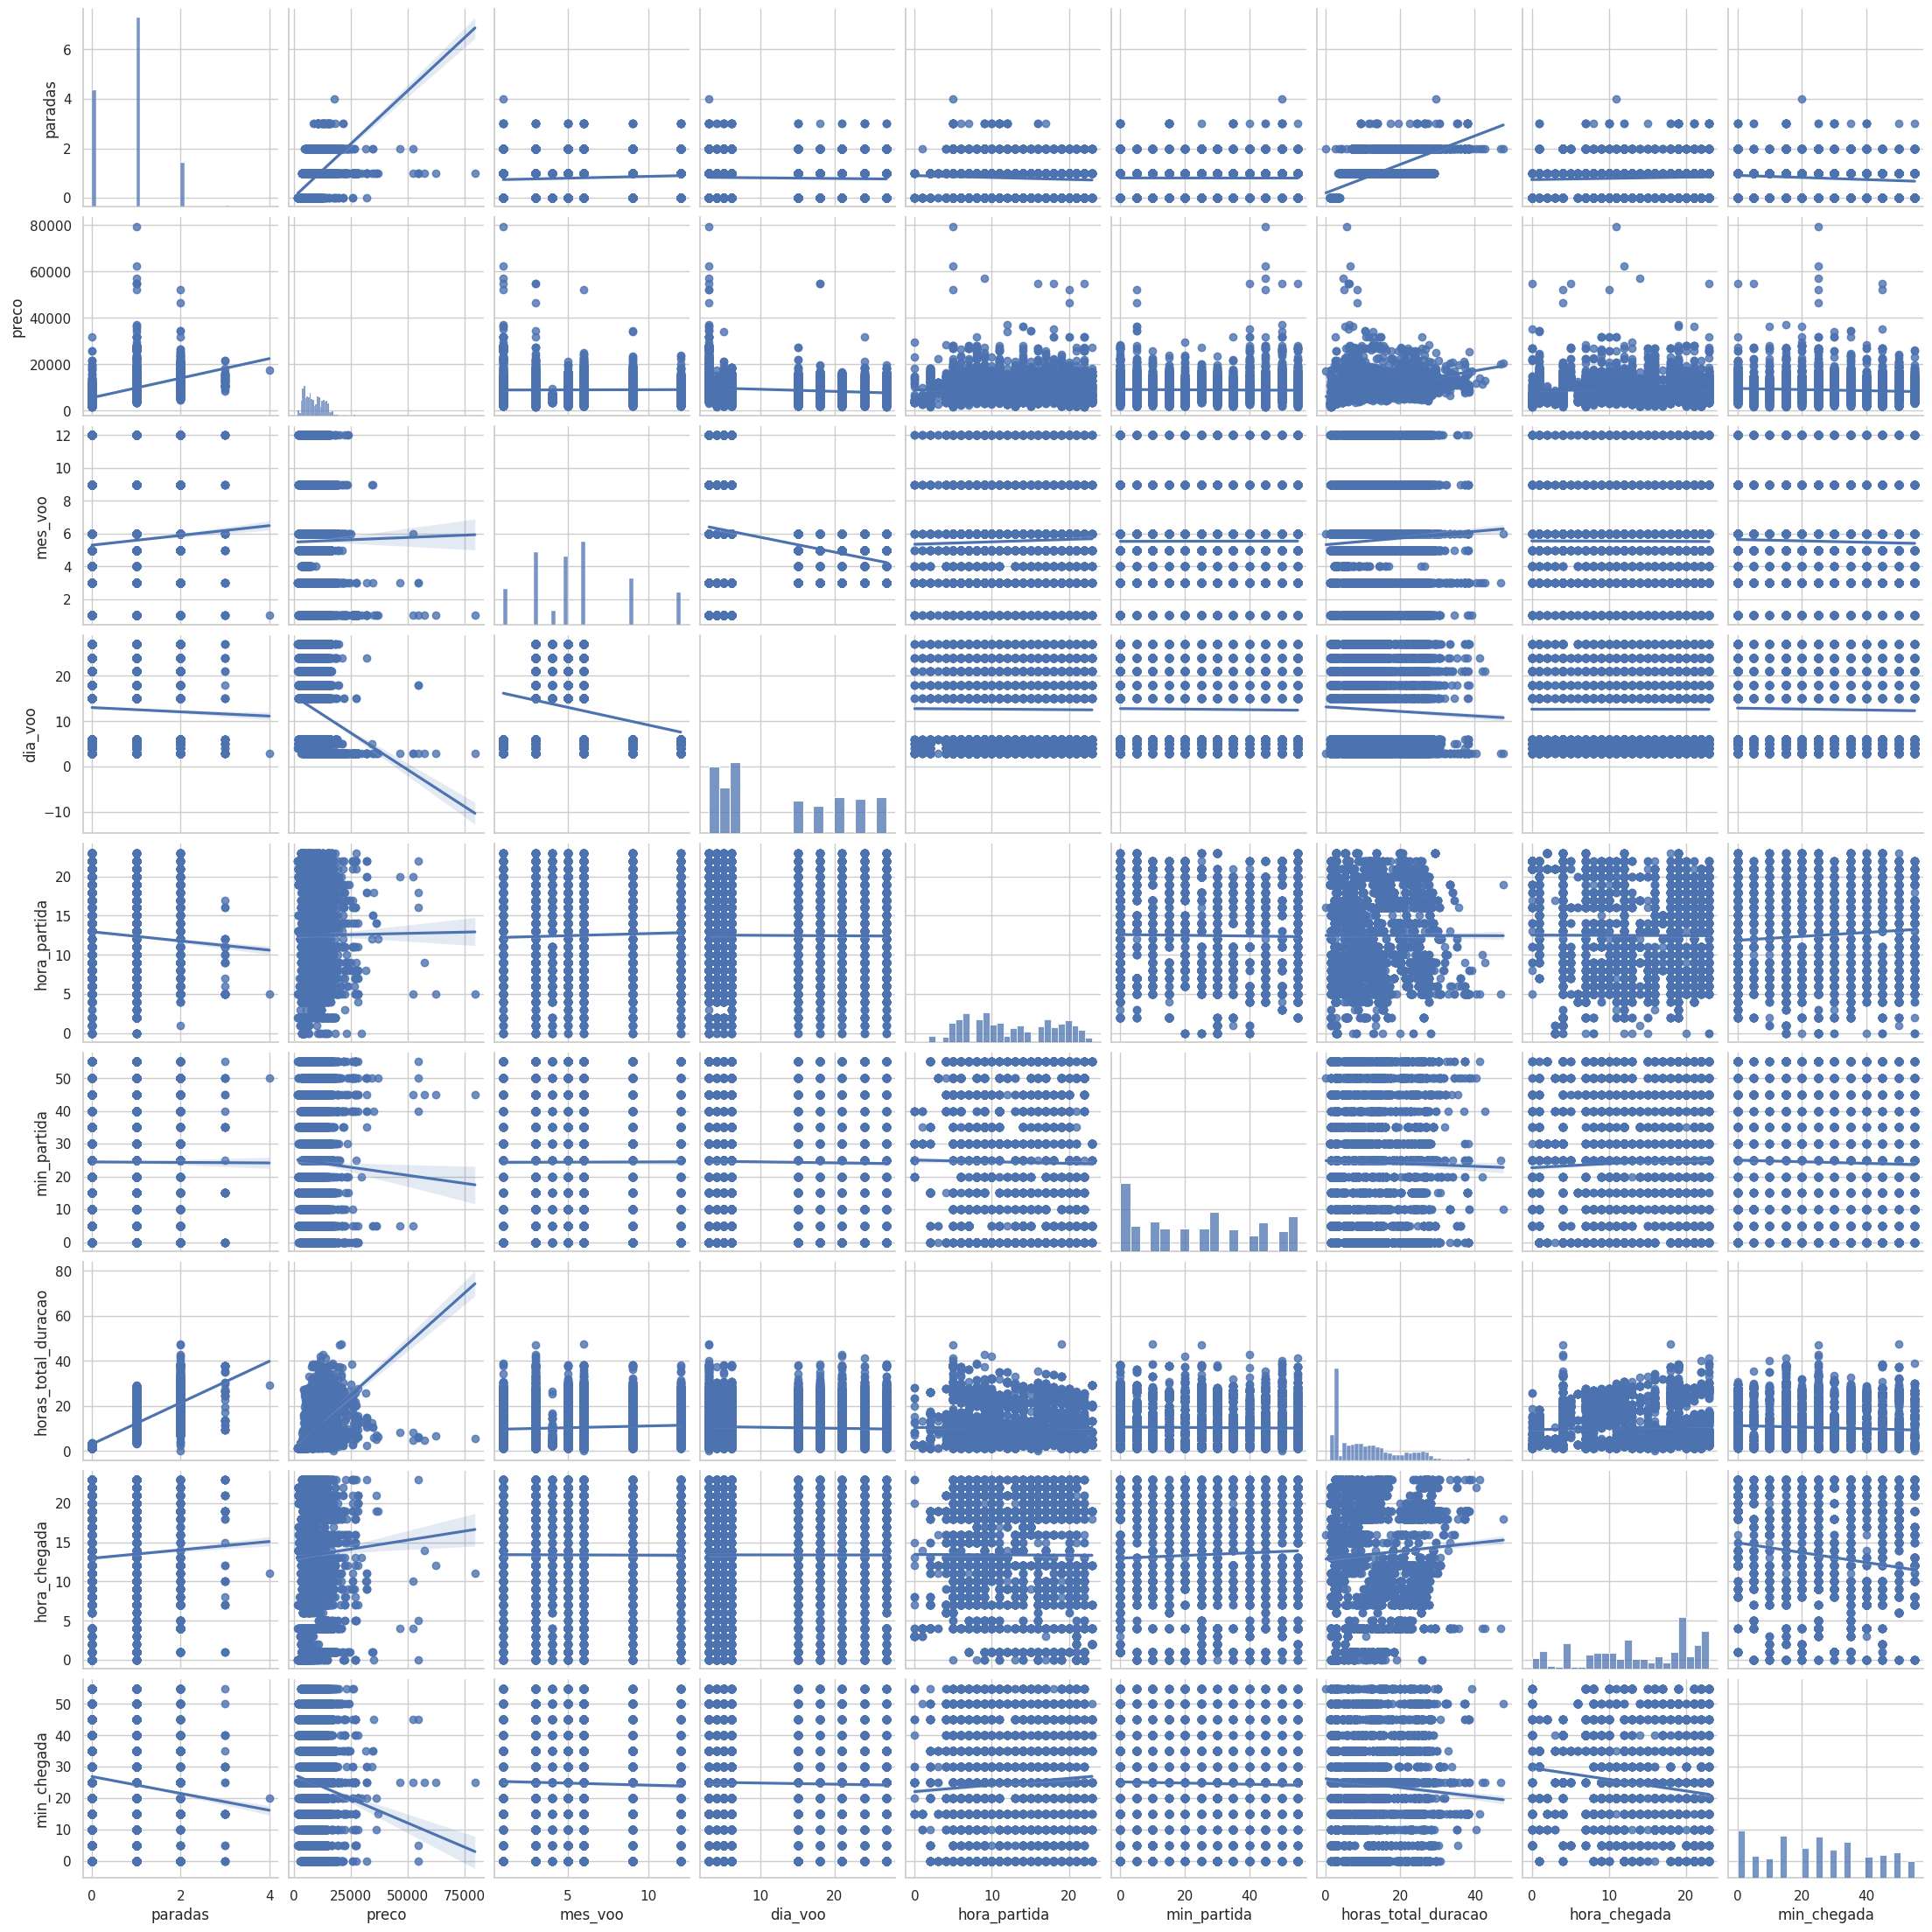

In [51]:
# Plotagem das colunas
sns.pairplot(df, kind='reg');

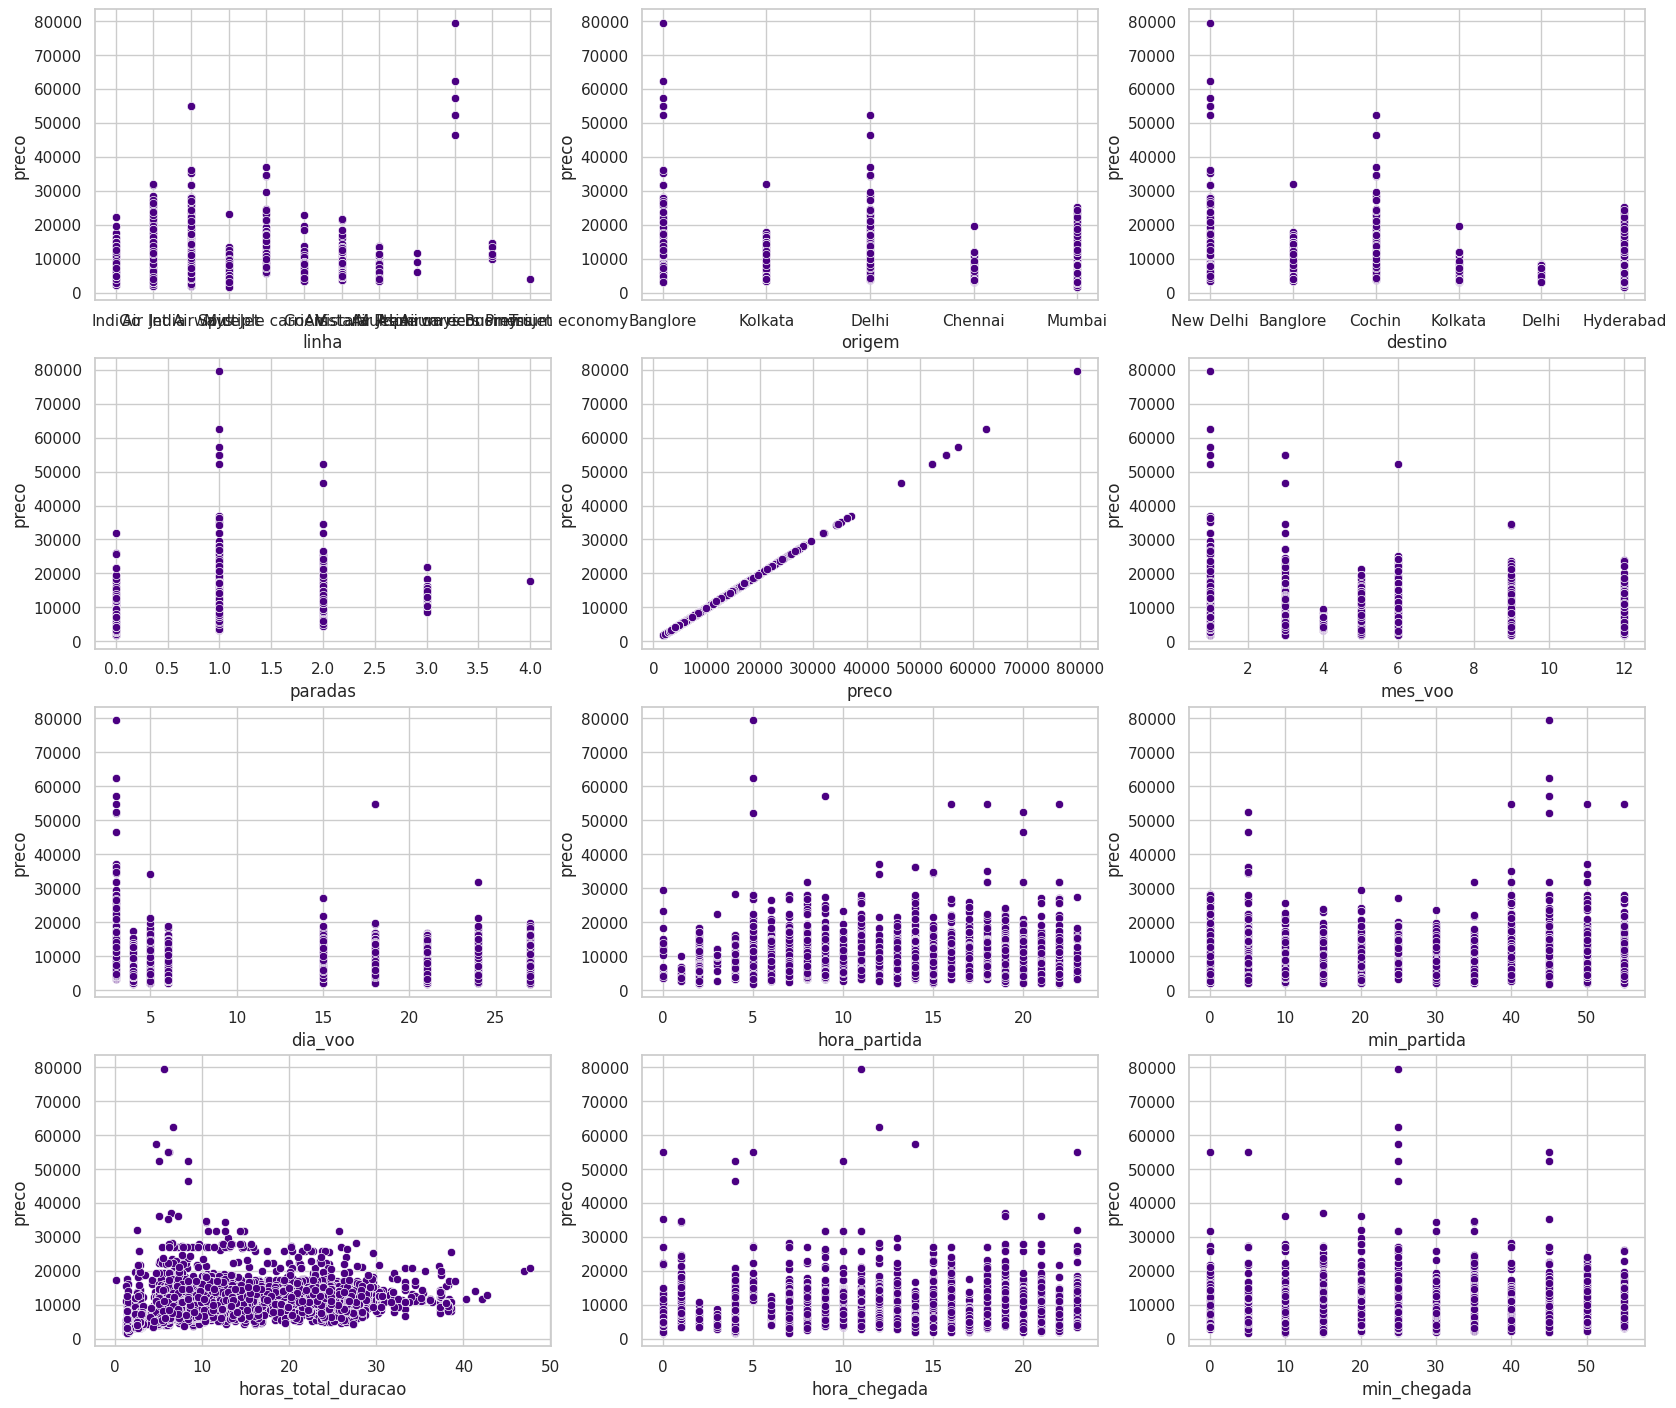

In [52]:
# Plotagem das colunas por preço
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 3, x)
    sns.scatterplot(data = df, x = d, y = 'preco', color = 'indigo')
    x += 1

**2.4 - Divisão em Dados de Treino e Teste**

In [53]:
# Separação das variáveis preditoras da variável alvo
X = df.drop(columns='preco') 
Y = df['preco']

In [54]:
# Divisão do Dataset em treino e test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=18)

In [55]:
# Tamanho de cada um dos conjuntos do Dataset após a divisão
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7323, 11), (3139, 11), (7323,), (3139,))

In [56]:
X_train.head()

,linha,origem,destino,paradas,mes_voo,dia_voo,hora_partida,min_partida,horas_total_duracao,hora_chegada,min_chegada
8513,SpiceJet,Banglore,Delhi,0,1,4,5,55,2.666667,8,35
10458,Multiple carriers,Delhi,Cochin,1,1,3,14,35,7.750000,22,20
9701,Multiple carriers,Delhi,Cochin,1,6,27,8,30,10.500000,19,0
8636,IndiGo,Delhi,Cochin,1,6,27,7,35,8.583333,16,10
6728,IndiGo,Delhi,Cochin,0,6,15,5,35,3.250000,8,50


**2.5 - Encoding**

In [57]:
# Transformação das variáveis categóricas em numéricas
X_train = pd.get_dummies(X_train, prefix=['linha', 'origem', 'destino'], columns=['linha', 'origem', 'destino'])

In [58]:
X_train.head(10)

,paradas,mes_voo,dia_voo,hora_partida,min_partida,horas_total_duracao,hora_chegada,min_chegada,linha_Air Asia,linha_Air India,linha_GoAir,linha_IndiGo,linha_Jet Airways,linha_Jet Airways Business,linha_Multiple carriers,linha_Multiple carriers Premium economy,linha_SpiceJet,linha_Trujet,linha_Vistara,linha_Vistara Premium economy,origem_Banglore,origem_Chennai,origem_Delhi,origem_Kolkata,origem_Mumbai,destino_Banglore,destino_Cochin,destino_Delhi,destino_Hyderabad,destino_Kolkata,destino_New Delhi
8513,0,1,4,5,55,2.666667,8,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10458,1,1,3,14,35,7.750000,22,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9701,1,6,27,8,30,10.500000,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8636,1,6,27,7,35,8.583333,16,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6728,0,6,15,5,35,3.250000,8,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1557,1,3,6,17,45,7.750000,1,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2414,2,6,3,5,25,23.000000,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7140,0,5,21,8,30,2.833333,11,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
305,1,3,27,13,0,15.416667,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4000,0,3,6,7,10,2.916667,10,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [59]:
X_train.shape

(7323, 31)

In [60]:
# Resetar os índices do Dataset
X_train.reset_index(drop=True, inplace=True)

In [61]:
X_train.head(10)

,paradas,mes_voo,dia_voo,hora_partida,min_partida,horas_total_duracao,hora_chegada,min_chegada,linha_Air Asia,linha_Air India,linha_GoAir,linha_IndiGo,linha_Jet Airways,linha_Jet Airways Business,linha_Multiple carriers,linha_Multiple carriers Premium economy,linha_SpiceJet,linha_Trujet,linha_Vistara,linha_Vistara Premium economy,origem_Banglore,origem_Chennai,origem_Delhi,origem_Kolkata,origem_Mumbai,destino_Banglore,destino_Cochin,destino_Delhi,destino_Hyderabad,destino_Kolkata,destino_New Delhi
0,0,1,4,5,55,2.666667,8,35,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,1,3,14,35,7.750000,22,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,6,27,8,30,10.500000,19,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6,27,7,35,8.583333,16,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,6,15,5,35,3.250000,8,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,1,3,6,17,45,7.750000,1,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6,2,6,3,5,25,23.000000,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,5,21,8,30,2.833333,11,20,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,1,3,27,13,0,15.416667,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,0,3,6,7,10,2.916667,10,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


# 3. Multicolinearidade - Variance Inflation Factor (VIF)

In [62]:
# Verificar a multicolinearidade mediante o VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
15,linha_Multiple carriers Premium economy,inf
16,linha_SpiceJet,inf
29,destino_Kolkata,inf
28,destino_Hyderabad,inf
27,destino_Delhi,inf
26,destino_Cochin,inf
25,destino_Banglore,inf
24,origem_Mumbai,inf
23,origem_Kolkata,inf
22,origem_Delhi,inf


**OBS:** No caso das variáveis dummies que representam uma variável categórica com três ou mais categorias, necessariamente terão valores altos de VIF se houver uma pequena parcela de casos na categoria, mesmo que a variável categórica não esteja associada a outras variáveis no modelo de regressão. Deste modo, os altos valores de VIF das variáveis dummys não são relevantes e podem ser desconsiderados.

Diante disso, vamos calcular o VIF somente para as variáveis numéricas.

In [63]:
# Listando colunas categóricas e numéricas:
Col_num = list(X_train.select_dtypes(include=['float64', 'int64']).columns)
print('Variáveis Númericas:', Col_num)

Variáveis Númericas: ['paradas', 'mes_voo', 'dia_voo', 'hora_partida', 'min_partida', 'horas_total_duracao', 'hora_chegada', 'min_chegada']


In [64]:
X_train_num = pd.DataFrame(X_train, 
             columns=['paradas', 'mes_voo', 'dia_voo', 'hora_partida', 'min_partida', 'horas_total_duracao', 'hora_chegada', 'min_chegada'])

In [65]:
# Verificar a multicolinearidade mediante o VIF
vif = pd.DataFrame()
vif['Features'] = X_train_num.columns
vif['VIF'] = [variance_inflation_factor(X_train_num.values, i) for i in range(X_train_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,horas_total_duracao,5.53
0,paradas,5.30
3,hora_partida,4.80
6,hora_chegada,4.08
1,mes_voo,3.83
7,min_chegada,2.85
2,dia_voo,2.69
4,min_partida,2.51


Verifica-se um alto valor de VIF em horas_total_duracao e paradas. Na análise exploratória, através do gráfico de correlação, já havíamos detectado uma forte correlação entre as duas, agora temos mais uma evidência através do VIF. Assim, vamos excluir a variável parada pois horas_total_duracao já carrega consigo a informação necessária.

In [66]:
X_train_num = X_train_num.drop('paradas', 1,)

In [67]:
# Verificar a multicolinearidade mediante o VIF
vif = pd.DataFrame()
vif['Features'] = X_train_num.columns
vif['VIF'] = [variance_inflation_factor(X_train_num.values, i) for i in range(X_train_num.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,hora_partida,4.79
5,hora_chegada,4.07
0,mes_voo,3.78
6,min_chegada,2.84
1,dia_voo,2.67
3,min_partida,2.50
4,horas_total_duracao,2.45


Agora todos os valores numéricos estão com um Valor de VIF aceitável, e podemos fazer a seleção de variáveis.

In [68]:
X_train = X_train.drop('paradas', 1,)

# 4. Seleção de Variáveis

**4.1 - ExtraTreesRegressor**

In [69]:
# Método Ensemble para Seleção de Variáveis
# Importância do Atributo com o Extra Trees Classifier

# Criação do Modelo - Feature Selection 
modelo = ExtraTreesRegressor(random_state=18)
modelo.fit(X_train, Y_train)

# Resultados
print(modelo.feature_importances_)

[8.70781185e-02 1.07811145e-01 3.07809391e-02 3.67212776e-02
 2.17139673e-01 3.40887594e-02 2.93222935e-02 2.73599943e-03
 4.04128816e-02 1.98474645e-03 9.27843656e-03 1.50523012e-01
 7.90641685e-02 5.06551507e-02 7.31114552e-04 3.08855453e-03
 6.48154102e-05 5.98517395e-03 1.91386654e-04 7.68441644e-03
 4.36383262e-04 5.12650828e-03 3.12899528e-03 1.53537514e-02
 2.94160903e-03 4.82386424e-03 3.86772668e-02 1.67574574e-02
 4.91759703e-04 1.69203422e-02]


In [70]:
# Transformação em pandas series
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)

In [71]:
# Variáveis mais importantes
feat_importances.sort_values(ascending=False)

horas_total_duracao                        0.217140
linha_Jet Airways                          0.150523
dia_voo                                    0.107811
mes_voo                                    0.087078
linha_Jet Airways Business                 0.079064
linha_Multiple carriers                    0.050655
linha_Air India                            0.040413
destino_Delhi                              0.038677
min_partida                                0.036721
hora_chegada                               0.034089
hora_partida                               0.030781
min_chegada                                0.029322
destino_New Delhi                          0.016920
destino_Hyderabad                          0.016757
origem_Mumbai                              0.015354
linha_IndiGo                               0.009278
origem_Banglore                            0.007684
linha_Vistara                              0.005985
origem_Delhi                               0.005127
destino_Coch

Selecionar apenas as variáveis que apresentarem algum grau de importância.

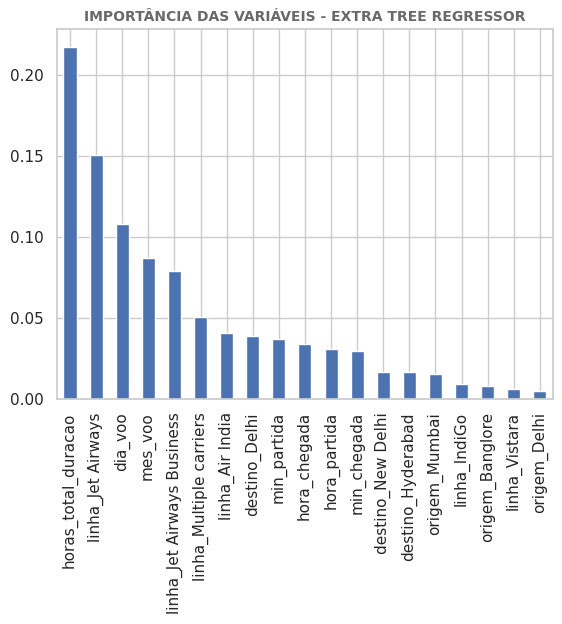

In [72]:
# Gráfico das variáveis mais importantes ExtraTreesRegressor
feat_importances = pd.Series(modelo.feature_importances_, index=X_train.columns)
feat_importances.nlargest(19).plot.bar()
plt.title('IMPORTÂNCIA DAS VARIÁVEIS - EXTRA TREE REGRESSOR', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.show()

# 5. Modelos Baseline com Cross Validation

**5.1 - Sem Dados Normalizados ou Padronizados**

In [73]:
# Criação do DataFrame com as colunas finais selecionadas
X_train = pd.DataFrame(X_train, 
             columns=['horas_total_duracao', 'linha_Jet Airways', 'dia_voo', 'mes_voo', 'linha_Jet Airways Business',
'linha_Multiple carriers', 'linha_Air India', 'destino_Delhi', 'min_partida', 'hora_chegada',
'hora_partida', 'min_chegada', 'destino_New Delhi', 'destino_Hyderabad', 'origem_Mumbai',
'linha_IndiGo', 'origem_Banglore', 'linha_Vistara', 'origem_Delhi'])

In [74]:
%%time

# Avalição dos Modelos Preditivos

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Lista de modelos

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('KNeighborsRegressor', KNeighborsRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('XGBRegressor', XGBRegressor()))
modelos.append(('SVR', SVR()))
modelos.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
modelos.append(('AdaBoostRegressor', AdaBoostRegressor()))
modelos.append(('LGBMRegressor', ltb.LGBMRegressor()))
modelos.append(('BaggingRegressor', BaggingRegressor()))

# Avaliando cada modelo em um loop 

nomes = []
resultados = []
resultados_mean = []
resultados_std = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(modelo, X_train, Y_train, cv = kfold, scoring='r2')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
    
model_result = pd.DataFrame({
    'Modelo': nomes,
    'Mean': resultados_mean,
    'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

CPU times: user 1min 52s, sys: 4.77 s, total: 1min 56s
Wall time: 1min 26s


,Modelo,Mean,STD
4,XGBRegressor,81.392669,2.504304
3,RandomForestRegressor,79.100668,3.154022
9,BaggingRegressor,78.784282,3.109456
8,LGBMRegressor,78.514812,4.570105
2,GradientBoostingRegressor,74.982474,3.519744
6,DecisionTreeRegressor,66.041730,7.314603
0,LinearRegression,56.605861,3.954455
1,KNeighborsRegressor,53.839963,4.000184
7,AdaBoostRegressor,26.818624,13.410760
5,SVR,0.058250,1.291521


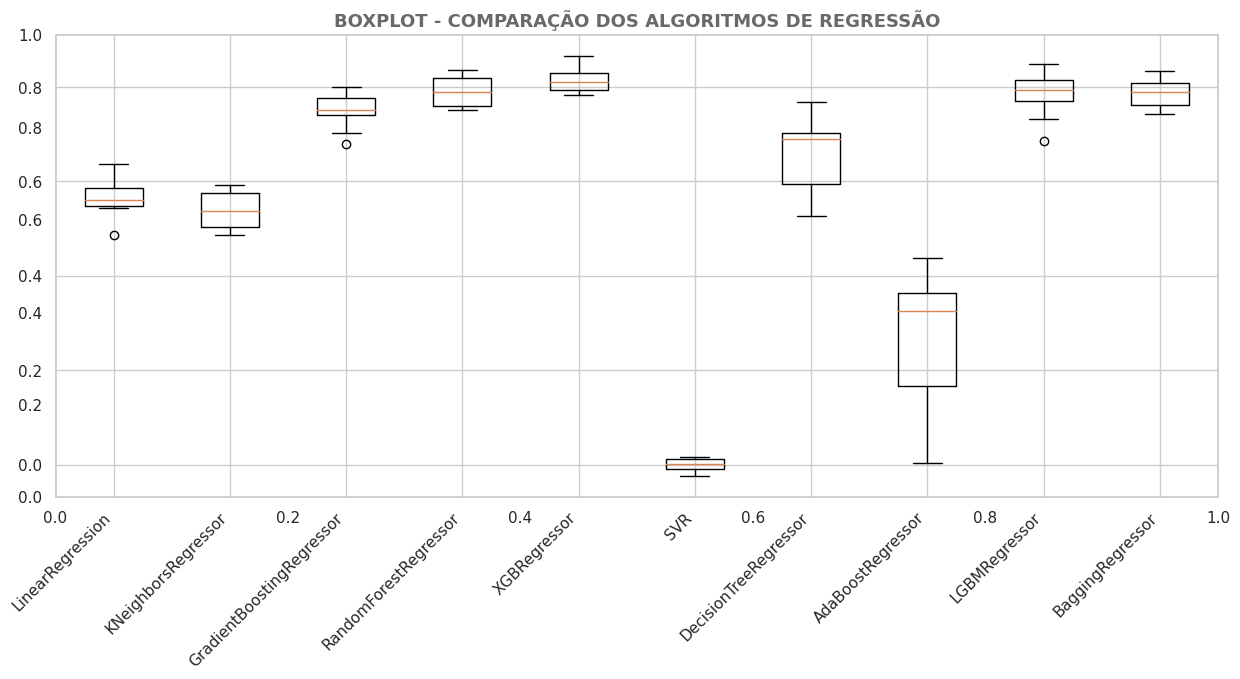

In [75]:
# Boxplot para comparar os algoritmos

fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARAÇÃO DOS ALGORITMOS DE REGRESSÃO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.xticks(rotation=45, ha='right')
plt.show();

**OBS:** Métodos baseados em árvores tais como Bagging, Random Forests e Boosting não necessitam que os dados estejam normalizados ou padronizados. Porém, os algoritmos LinearRegression, KNeighborsRegressor e SVR melhoram consideravelmente seu resultado com dados normalizados ou padronizados. À vista disso, vamos avaliar estes algoritmos com dados normalizados e padronizados e verificar se superam os resultados dos algoritmos baseados em árvores.

**5.2 - Dados Normalizados**

**5.2.1 - Normalização**

In [76]:
# Colunas numéricas
col_num = ['mes_voo', 'dia_voo', 'hora_partida', 'min_partida',
       'horas_total_duracao', 'hora_chegada', 'min_chegada']

In [77]:
# Cópia do DataFrame
X_train_norm = X_train.copy()

In [78]:
# Criação do normalizador
normalizacao = MinMaxScaler()

In [79]:
# Aplica a normalização
X_train_norm[col_num] = normalizacao.fit_transform(X_train[col_num])

In [80]:
#Resumo Estatístico Dados Padronizados
X_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
horas_total_duracao,7323.0,0.218946,0.175023,0.0,0.057793,0.176883,0.316988,1.0
linha_Jet Airways,7323.0,0.349857,0.476957,0.0,0.000000,0.000000,1.000000,1.0
dia_voo,7323.0,0.401970,0.366416,0.0,0.083333,0.125000,0.750000,1.0
mes_voo,7323.0,0.415751,0.272681,0.0,0.181818,0.363636,0.454545,1.0
linha_Jet Airways Business,7323.0,0.000683,0.026123,0.0,0.000000,0.000000,0.000000,1.0
linha_Multiple carriers,7323.0,0.115800,0.320006,0.0,0.000000,0.000000,0.000000,1.0
linha_Air India,7323.0,0.163458,0.369808,0.0,0.000000,0.000000,0.000000,1.0
destino_Delhi,7323.0,0.122081,0.327402,0.0,0.000000,0.000000,0.000000,1.0
min_partida,7323.0,0.441498,0.340420,0.0,0.090909,0.454545,0.727273,1.0
hora_chegada,7323.0,0.583973,0.296853,0.0,0.347826,0.608696,0.826087,1.0


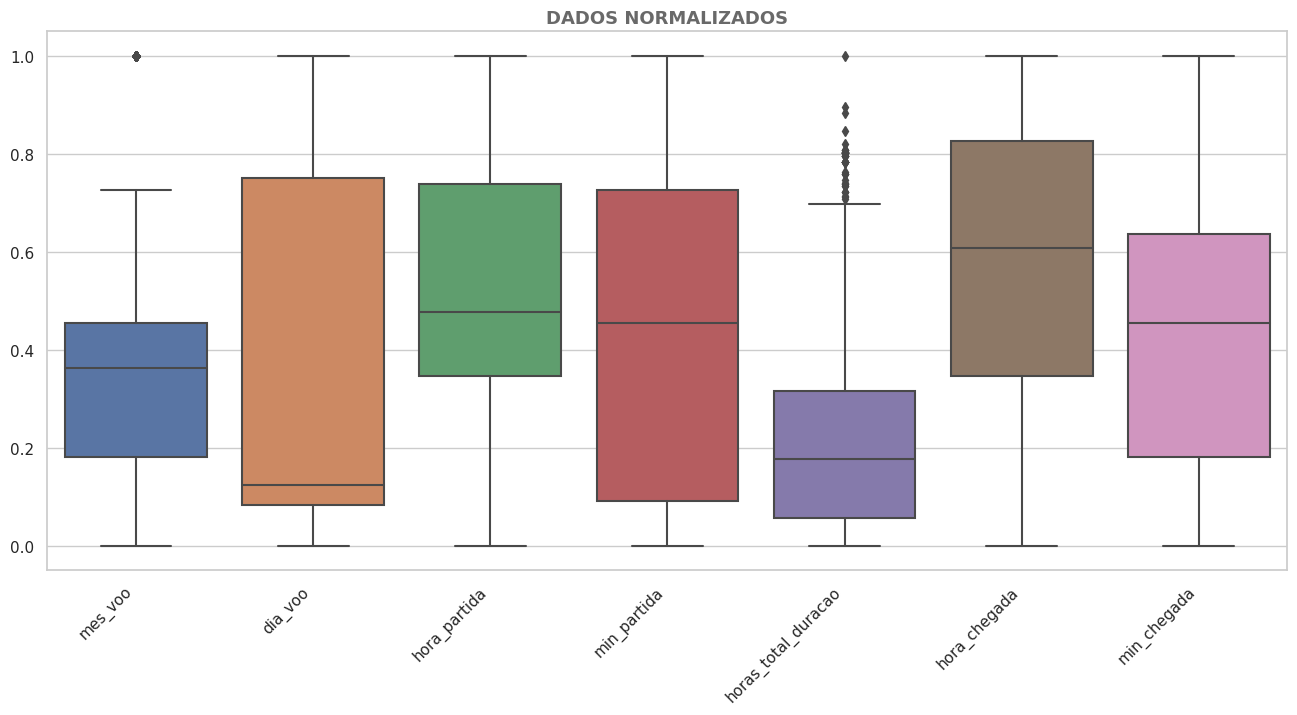

In [81]:
# Boxplot Dados Normalizados

#Plot
plt.figure(figsize=(16,7))
ax = sns.boxplot(data=X_train_norm[col_num])
plt.xticks(rotation=45, ha='right')
plt.title('DADOS NORMALIZADOS', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.show();

In [82]:
# Criação do DataFrame com Dados Normalizados
X_train_norm = pd.DataFrame(X_train_norm, 
             columns=['horas_total_duracao', 'linha_Jet Airways', 'dia_voo', 'mes_voo', 'linha_Jet Airways Business',
'linha_Multiple carriers', 'linha_Air India', 'destino_Delhi', 'min_partida', 'hora_chegada',
'hora_partida', 'min_chegada', 'destino_New Delhi', 'destino_Hyderabad', 'origem_Mumbai',
'linha_IndiGo', 'origem_Banglore', 'linha_Vistara', 'origem_Delhi'])

In [83]:
%%time

# Avalição dos Modelos Preditivos

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Lista de modelos

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('KNeighborsRegressor', KNeighborsRegressor()))
modelos.append(('SVR', SVR()))

# Avaliando cada modelo em um loop 

nomes = []
resultados = []
resultados_mean = []
resultados_std = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(modelo, X_train_norm, Y_train, cv = kfold, scoring='r2')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados
    
model_result = pd.DataFrame({
    'Modelo': nomes,
    'Mean': resultados_mean,
    'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

CPU times: user 39.4 s, sys: 3.68 s, total: 43.1 s
Wall time: 38.7 s


,Modelo,Mean,STD
1,KNeighborsRegressor,68.322888,5.596849
0,LinearRegression,56.605861,3.954455
2,SVR,3.681394,1.612046


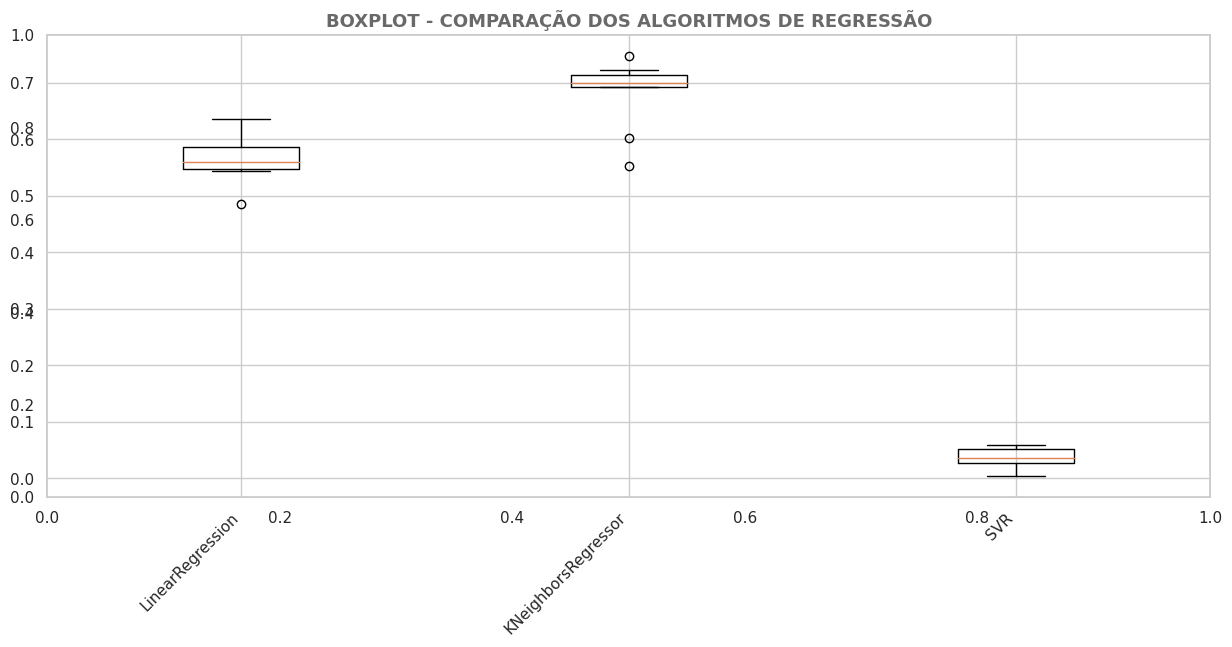

In [84]:
# Boxplot para comparar os algoritmos

#Plot
fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARAÇÃO DOS ALGORITMOS DE REGRESSÃO', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.xticks(rotation=45, ha='right')
plt.show();

**5.3 - Dados Padronizados**

**5.3.1 - Padronização**

In [85]:
# Copia do Dataset
X_train_padr = X_train.copy()

In [86]:
# Padronizador
padronizacao = StandardScaler()

In [87]:
# Aplica a padronização
X_train_padr[col_num] = padronizacao.fit_transform(X_train[col_num])

In [88]:
#Resumo Estatístico Dados Padronizados
X_train_padr.describe().T

,count,mean,std,min,25%,50%,75%,max
horas_total_duracao,7323.0,1.959984e-16,1.000068,-1.251042,-0.920815,-0.240348,0.560202,4.462881
linha_Jet Airways,7323.0,3.498566e-01,0.476957,0.000000,0.000000,0.000000,1.000000,1.000000
dia_voo,7323.0,-7.665284e-17,1.000068,-1.097107,-0.869663,-0.755941,0.949888,1.632220
mes_voo,7323.0,2.522752e-17,1.000068,-1.524786,-0.857960,-0.191133,0.142280,2.142759
linha_Jet Airways Business,7323.0,6.827803e-04,0.026123,0.000000,0.000000,0.000000,0.000000,1.000000
linha_Multiple carriers,7323.0,1.157995e-01,0.320006,0.000000,0.000000,0.000000,0.000000,1.000000
linha_Air India,7323.0,1.634576e-01,0.369808,0.000000,0.000000,0.000000,0.000000,1.000000
destino_Delhi,7323.0,1.220811e-01,0.327402,0.000000,0.000000,0.000000,0.000000,1.000000
min_partida,7323.0,7.859342e-17,1.000068,-1.297012,-1.029944,0.038330,0.839535,1.640740
hora_chegada,7323.0,5.530648e-17,1.000068,-1.967350,-0.795557,0.083288,0.815659,1.401555


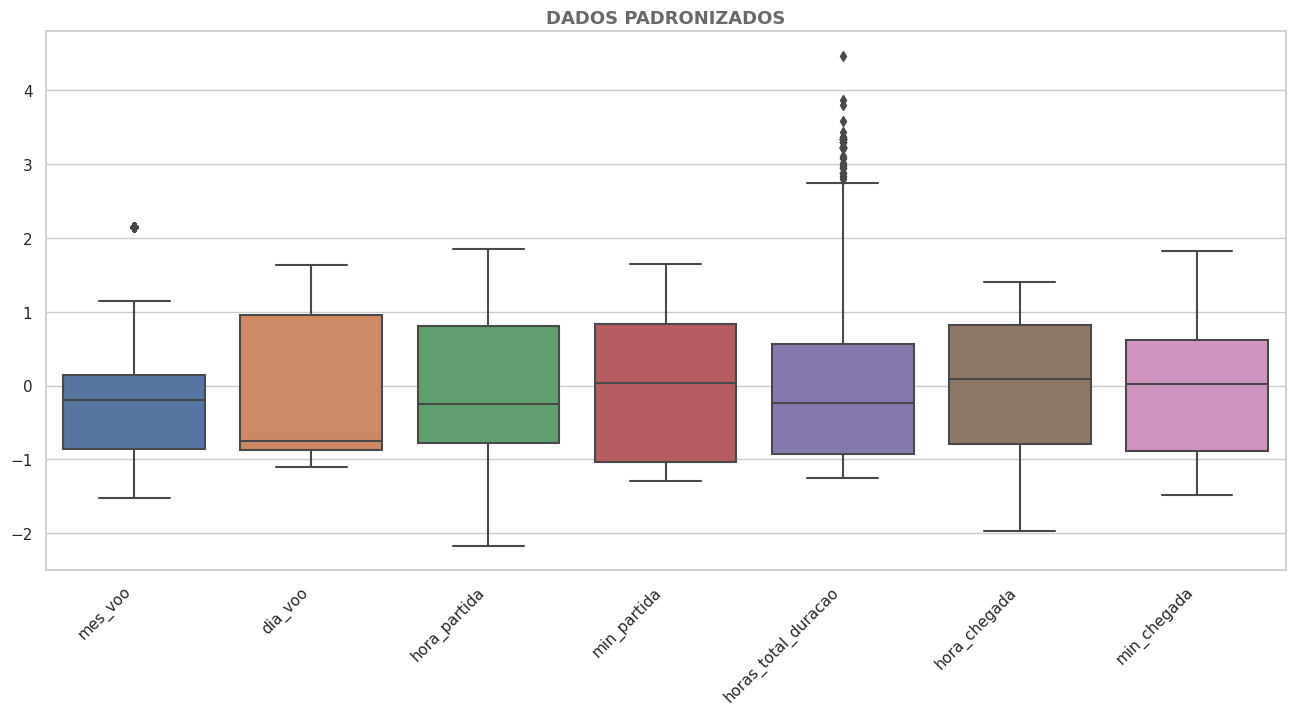

In [89]:
#Boxplot Dados Padronizados

#Plot
plt.figure(figsize=(16,7))
ax = sns.boxplot(data=X_train_padr[col_num])
plt.xticks(rotation=45, ha='right')
plt.title('DADOS PADRONIZADOS', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.show();

In [90]:
# Criação do DataFrame com Dados Padronizados
X_train_padr = pd.DataFrame(X_train_padr, 
             columns=['horas_total_duracao', 'linha_Jet Airways', 'dia_voo', 'mes_voo', 'linha_Jet Airways Business',
'linha_Multiple carriers', 'linha_Air India', 'destino_Delhi', 'min_partida', 'hora_chegada',
'hora_partida', 'min_chegada', 'destino_New Delhi', 'destino_Hyderabad', 'origem_Mumbai',
'linha_IndiGo', 'origem_Banglore', 'linha_Vistara', 'origem_Delhi'])

In [91]:
%%time

# Avalição dos Modelos Preditivos

# Definindo os valores para o número de folds 
num_folds = 10
seed = 18

# Lista de modelos

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('KNeighborsRegressor', KNeighborsRegressor()))
modelos.append(('SVR', SVR()))


# Avaliando cada modelo em um loop 

nomes = []
resultados = []
resultados_mean = []
resultados_std = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(modelo, X_train_padr, Y_train, cv = kfold, scoring='r2')
    resultados.append(cv_results)
    resultados_mean.append(cv_results.mean()*100)
    resultados_std.append(cv_results.std()*100)
    nomes.append(nome)

# Resultados    
    
model_result = pd.DataFrame({
    'Modelo': nomes,
    'Mean': resultados_mean,
    'STD': resultados_std})

model_result.sort_values('Mean', ascending=False)

CPU times: user 38.8 s, sys: 3.74 s, total: 42.6 s
Wall time: 37.9 s


,Modelo,Mean,STD
1,KNeighborsRegressor,66.720823,5.000942
0,LinearRegression,56.605861,3.954455
2,SVR,1.592516,1.411273


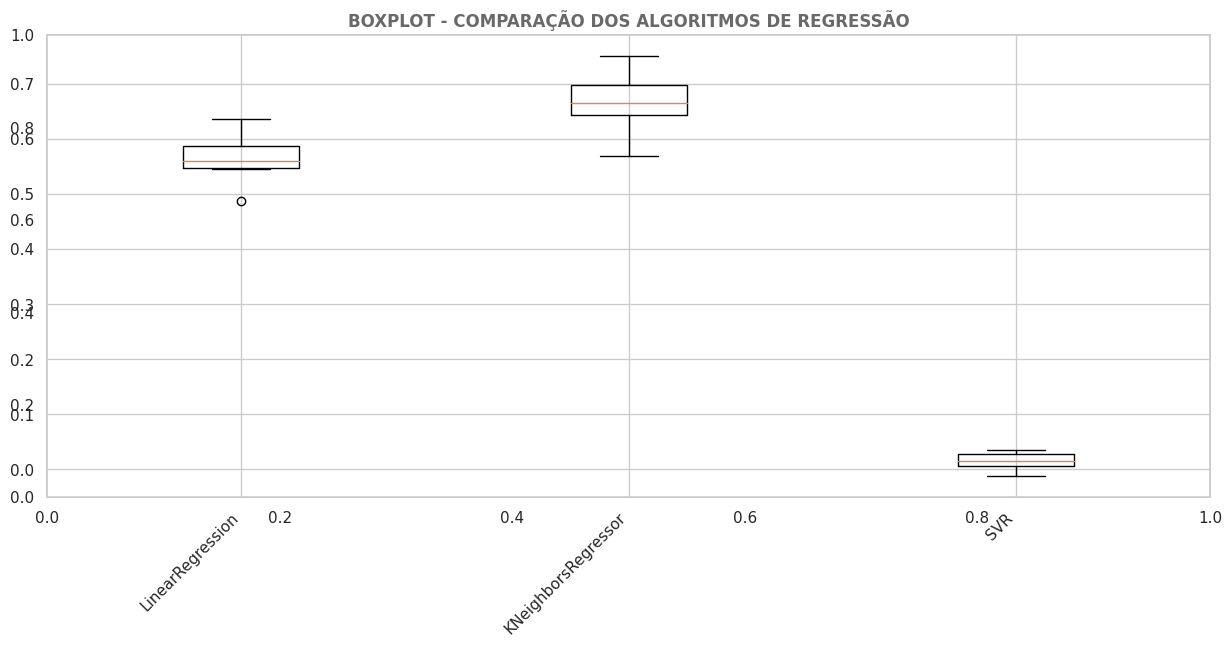

In [92]:
# Boxplot para comparar os algoritmos

#Plot
fig = plt.figure(figsize = (15,6))
plt.title('BOXPLOT - COMPARAÇÃO DOS ALGORITMOS DE REGRESSÃO', fontsize = 12, color ='dimgrey', fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.xticks(rotation=45, ha='right')
plt.show();

**Conclusão:** Testamos algoritmos que não são baseados em árvores como KNeighborsRegressor, LinearRegression e SVR em dados normalizados e padronizados e obtivemos uma melhora nos resultados em ambos os casos. Porém, modelos baseados em árvores ainda apresentaram os melhores resultados.

Iremos escolher os três melhores modelos avaliados por meio da Cross Validation para aplicar a tunagem de hiperparâmetros.

# 6. Pré-processamento para os Dados de Teste

In [93]:
#DUMMIES

X_test = pd.get_dummies(X_test, prefix=['linha', 'origem', 'destino'], columns=['linha', 'origem','destino'])

# Criação do DataFrame para X_test
X_test = pd.DataFrame(X_test, 
             columns=['horas_total_duracao', 'linha_Jet Airways', 'dia_voo', 'mes_voo', 'linha_Jet Airways Business',
'linha_Multiple carriers', 'linha_Air India', 'destino_Delhi', 'min_partida', 'hora_chegada',
'hora_partida', 'min_chegada', 'destino_New Delhi', 'destino_Hyderabad', 'origem_Mumbai',
'linha_IndiGo', 'origem_Banglore', 'linha_Vistara', 'origem_Delhi'])

# Reset dos índices
X_test.reset_index(drop=True, inplace=True)

In [94]:
X_test.head()

,horas_total_duracao,linha_Jet Airways,dia_voo,mes_voo,linha_Jet Airways Business,linha_Multiple carriers,linha_Air India,destino_Delhi,min_partida,hora_chegada,hora_partida,min_chegada,destino_New Delhi,destino_Hyderabad,origem_Mumbai,linha_IndiGo,origem_Banglore,linha_Vistara,origem_Delhi
0,17.500000,1,21,3,0,0,0,0,55,10,16,25,1,0,0,0,1,0,0
1,7.083333,1,24,6,0,0,0,0,30,12,5,35,0,0,0,0,0,0,1
2,5.083333,1,18,3,0,0,0,0,5,19,14,10,1,0,0,0,1,0,0
3,2.416667,0,5,1,0,0,0,0,0,11,9,25,0,0,0,0,0,0,0
4,22.416667,0,24,3,0,0,0,0,20,18,20,45,0,0,0,0,0,1,0


In [95]:
# Tamanhos finais dos X_train e X_test
X_train.shape, X_test.shape

((7323, 19), (3139, 19))

# 7. Comparação dos Melhores Modelos Avaliados por Cross Validation

Resultados XGBRegressor:
	
CV: 81.39	

Resultados RandomForestRegressor:
	
CV: 79.11

Resultados LGBMRegressor:
	
CV: 78.51

In [96]:
%%time

# Avalição dos Modelos Preditivos

# Métricas

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []

# Lista de modelos

modelos = []
modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('XGBRegressor', XGBRegressor()))
modelos.append(('LGBMRegressor', ltb.LGBMRegressor()))

# Avaliando cada modelo em um loop

nomes = []

for nome, modelo in modelos:

    modelo.fit(X_train, Y_train)
    
    pred = modelo.predict(X_test)

    RSquared1.append(metrics.r2_score(Y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(Y_test, pred))
    MSE1.append(metrics.mean_squared_error(Y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(Y_test, pred)*100)
    nomes.append(nome)
    
# Resultados
    
model_resul = pd.DataFrame({
    'Modelo': nomes,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

CPU times: user 5.94 s, sys: 49 ms, total: 5.99 s
Wall time: 3.31 s


,Modelo,R-Squared,MAE,MSE,RMSE,MAPE
2,LGBMRegressor,79.980933,1334.014743,4.119428e+06,2029.637377,15.314905
1,XGBRegressor,79.778477,1243.083949,4.161088e+06,2039.874598,14.028372
0,RandomForestRegressor,77.444863,1272.854352,4.641288e+06,2154.364954,14.189568


# 8. Otimização dos Modelos - Ajuste de Hiperparâmetros Com BayesSearchCV

**8.1 - XGBRegressor**

In [97]:
%%time

xgbr = XGBRegressor(random_state=18)

search_space_xgbr = {
              'learning_rate': Real(0.01, 0.05), #so called `eta` value
              'max_depth': Integer(5, 10),
              'min_child_weight': Integer(1, 5),
              'subsample': Real(0.3, 0.9),
              'colsample_bytree': Real(0.4, 0.9),
              'n_estimators': Integer(200, 500),
}

xgbr_search = BayesSearchCV(xgbr, search_space_xgbr, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=18)

xgbr_search.fit(X_train, Y_train)

CPU times: user 4min 8s, sys: 2min 14s, total: 6min 22s
Wall time: 11min 4s


BayesSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                             'learning_rate': Real(low=0.01, high=0.05, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=5, high=10, prior='uniform', transform='normalize'),
                         

In [98]:
xgbr_search.best_params_

OrderedDict([('colsample_bytree', 0.6814885429027403),
             ('learning_rate', 0.05),
             ('max_depth', 6),
             ('min_child_weight', 1),
             ('n_estimators', 500),
             ('subsample', 0.7462753579180952)])

In [99]:
xgbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.6814885429027403, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=18, reg_alpha=0, reg_lambda=1, ...)

In [100]:
xgbr_search.best_score_

0.8241053769829509

**8.2 - LGBMRegressor**

In [101]:
%%time

lgbmr = ltb.LGBMRegressor(random_state=18)

search_space_lgbmr = {
              'num_leaves': Integer(50, 100), #so called `eta` value
              'learning_rate': Real(0.001, 0.1),
              'max_depth': Integer(1, 4),
              'n_estimators': Integer(1000, 3000),
              'subsample': Real(0.5, 1.0),
}

lgbmr_search = BayesSearchCV(lgbmr, search_space_lgbmr, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=18)

lgbmr_search.fit(X_train, Y_train)

CPU times: user 4min 14s, sys: 2min 25s, total: 6min 39s
Wall time: 6min 22s


BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=18), n_jobs=-1,
              random_state=18, scoring='r2',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1000, high=3000, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [102]:
lgbmr_search.best_params_

OrderedDict([('learning_rate', 0.07545609968635378),
             ('max_depth', 4),
             ('n_estimators', 2536),
             ('num_leaves', 100),
             ('subsample', 0.5)])

In [103]:
lgbmr_search.best_estimator_

LGBMRegressor(learning_rate=0.07545609968635378, max_depth=4, n_estimators=2536,
              num_leaves=100, random_state=18, subsample=0.5)

In [104]:
lgbmr_search.best_score_

0.7750846959919734

**8.3 - Random Forest Regressor**

In [105]:
%%time

rfr = RandomForestRegressor(random_state=18)

search_space_rfr = {
              'max_depth': Integer(10, 100),
              'n_estimators': Integer(100, 1000),
              'min_samples_leaf': Integer(1, 5),
              'min_samples_split': Integer(2, 10),
              'bootstrap': Categorical(['True', 'False']),
              'max_features': Categorical(['auto', 'sqrt'])
}

rfr_search = BayesSearchCV(rfr, search_space_rfr, n_iter=50, scoring='r2', n_jobs=-1, cv=5, random_state=18)

rfr_search.fit(X_train, Y_train)

CPU times: user 4min 12s, sys: 2min 16s, total: 6min 29s
Wall time: 12min 7s


BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=18), n_jobs=-1,
              random_state=18, scoring='r2',
              search_spaces={'bootstrap': Categorical(categories=('True', 'False'), prior=None),
                             'max_depth': Integer(low=10, high=100, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('auto', 'sqrt'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize')})

In [106]:
rfr_search.best_params_

OrderedDict([('bootstrap', 'True'),
             ('max_depth', 88),
             ('max_features', 'sqrt'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 8),
             ('n_estimators', 100)])

In [107]:
rfr_search.best_estimator_

RandomForestRegressor(bootstrap='True', max_depth=88, max_features='sqrt',
                      min_samples_split=8, random_state=18)

In [108]:
rfr_search.best_score_

0.7985641719453017

**8.4 - Comparação dos Modelos após Tunagem de Hiperparâmetros**

In [109]:
%%time

# Avalição dos Modelos Preditivos

# Métricas

RSquared1 = []
MAE1 = []
MSE1 = []
RMSE1 = []
MAPE1 = []

# Lista de modelos

modelos = []
modelos.append(('RandomForestRegressor', RandomForestRegressor(random_state=18, bootstrap='True',
                                                               max_depth=88, max_features='sqrt',
                                                               min_samples_leaf=1, min_samples_split=8,
                                                               n_estimators=100)))

modelos.append(('XGBRegressor', XGBRegressor(random_state=18, colsample_bytree=0.68,
                                             learning_rate=0.05, max_depth=6,
                                             min_child_weight=1, n_estimators=500,
                                             nthread=-1, subsample=0.74)))

modelos.append(('LGBMRegressor', ltb.LGBMRegressor(random_state=18, n_estimators=2536,
                                                   num_leaves=100, learning_rate=0.075, max_depth=4,
                                                   subsample=0.5)))

# Avaliando cada modelo em um loop

nomes = []

for nome, modelo in modelos:

    modelo.fit(X_train, Y_train)
    
    pred = modelo.predict(X_test)

    RSquared1.append(metrics.r2_score(Y_test, pred)*100)
    MAE1.append(metrics.mean_absolute_error(Y_test, pred))
    MSE1.append(metrics.mean_squared_error(Y_test, pred))
    RMSE1.append(np.sqrt(metrics.mean_squared_error(Y_test, pred)))
    MAPE1.append(metrics.mean_absolute_percentage_error(Y_test, pred)*100)
    nomes.append(nome)
    
# Resultados  

model_resul = pd.DataFrame({
    'Modelo': nomes,
    'R-Squared': RSquared1,
    'MAE': MAE1,
    'MSE': MSE1,
    'RMSE': RMSE1,
    'MAPE': MAPE1})

model_resul.sort_values('R-Squared', ascending=False)

CPU times: user 29.5 s, sys: 426 ms, total: 29.9 s
Wall time: 17.3 s


,Modelo,R-Squared,MAE,MSE,RMSE,MAPE
1,XGBRegressor,81.923300,1226.077832,3.719737e+06,1928.661975,13.809235
0,RandomForestRegressor,80.519109,1284.940594,4.008685e+06,2002.169982,14.558545
2,LGBMRegressor,79.579137,1303.859389,4.202108e+06,2049.904285,14.799308


Após tunagem de hiperparâmetros o algoritmo XGBRegressor obteve os melhores resultados finais.

In [110]:
# Modelo Final

xgbr2 = XGBRegressor(random_state=18, colsample_bytree=0.68,
                                             learning_rate=0.05, max_depth=6,
                                             min_child_weight=1, n_estimators=500,
                                             nthread=-1, subsample=0.74)

xgbr2.fit(X_train, Y_train)

Y_pred2 = xgbr2.predict(X_test)

# Métricas

RSquared = metrics.r2_score(Y_test, Y_pred2)*100
MAE = metrics.mean_absolute_error(Y_test, Y_pred2)
MSE = metrics.mean_squared_error(Y_test, Y_pred2)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred2))
MAPE = metrics.mean_absolute_percentage_error(Y_test, Y_pred2)*100
    
# Resultado Final
    
model_result2 = {'Modelo': ['XGBRegressor'],
                 'R-Squared': [RSquared],
                 'MAE': [MAE],
                 'MSE': [MSE],
                 'RMSE': [RMSE],
                 'MAPE': [MAPE],}

result_final = pd.DataFrame(model_result2, index=['0'])

result_final

,Modelo,R-Squared,MAE,MSE,RMSE,MAPE
0,XGBRegressor,81.9233,1226.077832,3.719737e+06,1928.661975,13.809235


Obtivemos um R2 final igual a 81.92, isto significa que o modelo linear explica 81.92% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas neste modelo linear.

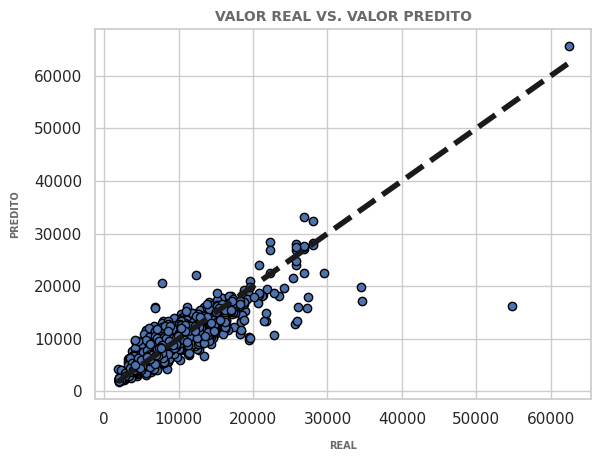

In [111]:
#Gráfico Y_test vs. Y_pred

#Plot
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred2, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.title('VALOR REAL VS. VALOR PREDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('REAL', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('PREDITO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.show();

Para uma melhor visualização vamos aplicar a escala logarítmica.

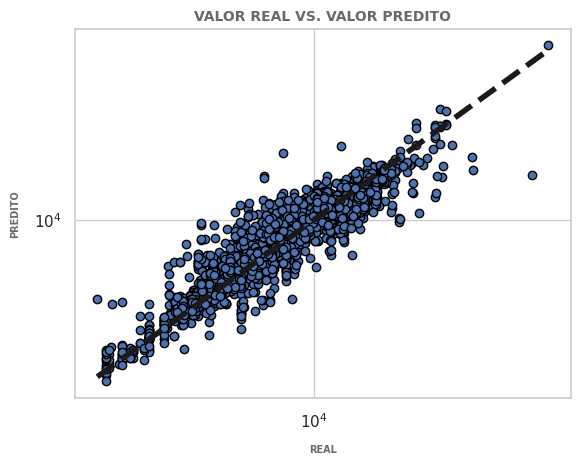

In [112]:
#Gráfico Y_test vs. Y_pred em escala logarítmica

#Plot
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred2, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.yscale('log')
plt.xscale('log')
plt.title('VALOR REAL VS. VALOR PREDITO', fontsize = 10, color ='dimgrey', fontweight = 'bold')
plt.xlabel('REAL', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.ylabel('PREDITO', color = 'dimgrey', labelpad = 10, fontweight = 'bold', fontsize = 7)
plt.show();

In [113]:
# Diferença Absoluta entre Y_test e Y_pred

dif= pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred2, 'Diferença Absoluta': (Y_test-Y_pred2).abs().round(2)})
dif.head(15)

,Y_test,Y_pred,Diferença Absoluta
3170,7832,7828.642090,3.36
7574,14441,13342.771484,1098.23
5644,13502,13750.482422,248.48
2614,3841,4010.262451,169.26
10213,12102,12033.463867,68.54
5264,5298,4879.363770,418.64
1456,14815,15992.463867,1177.46
3416,10152,13436.615234,3284.62
5933,10441,8975.068359,1465.93
1499,3383,4311.957031,928.96


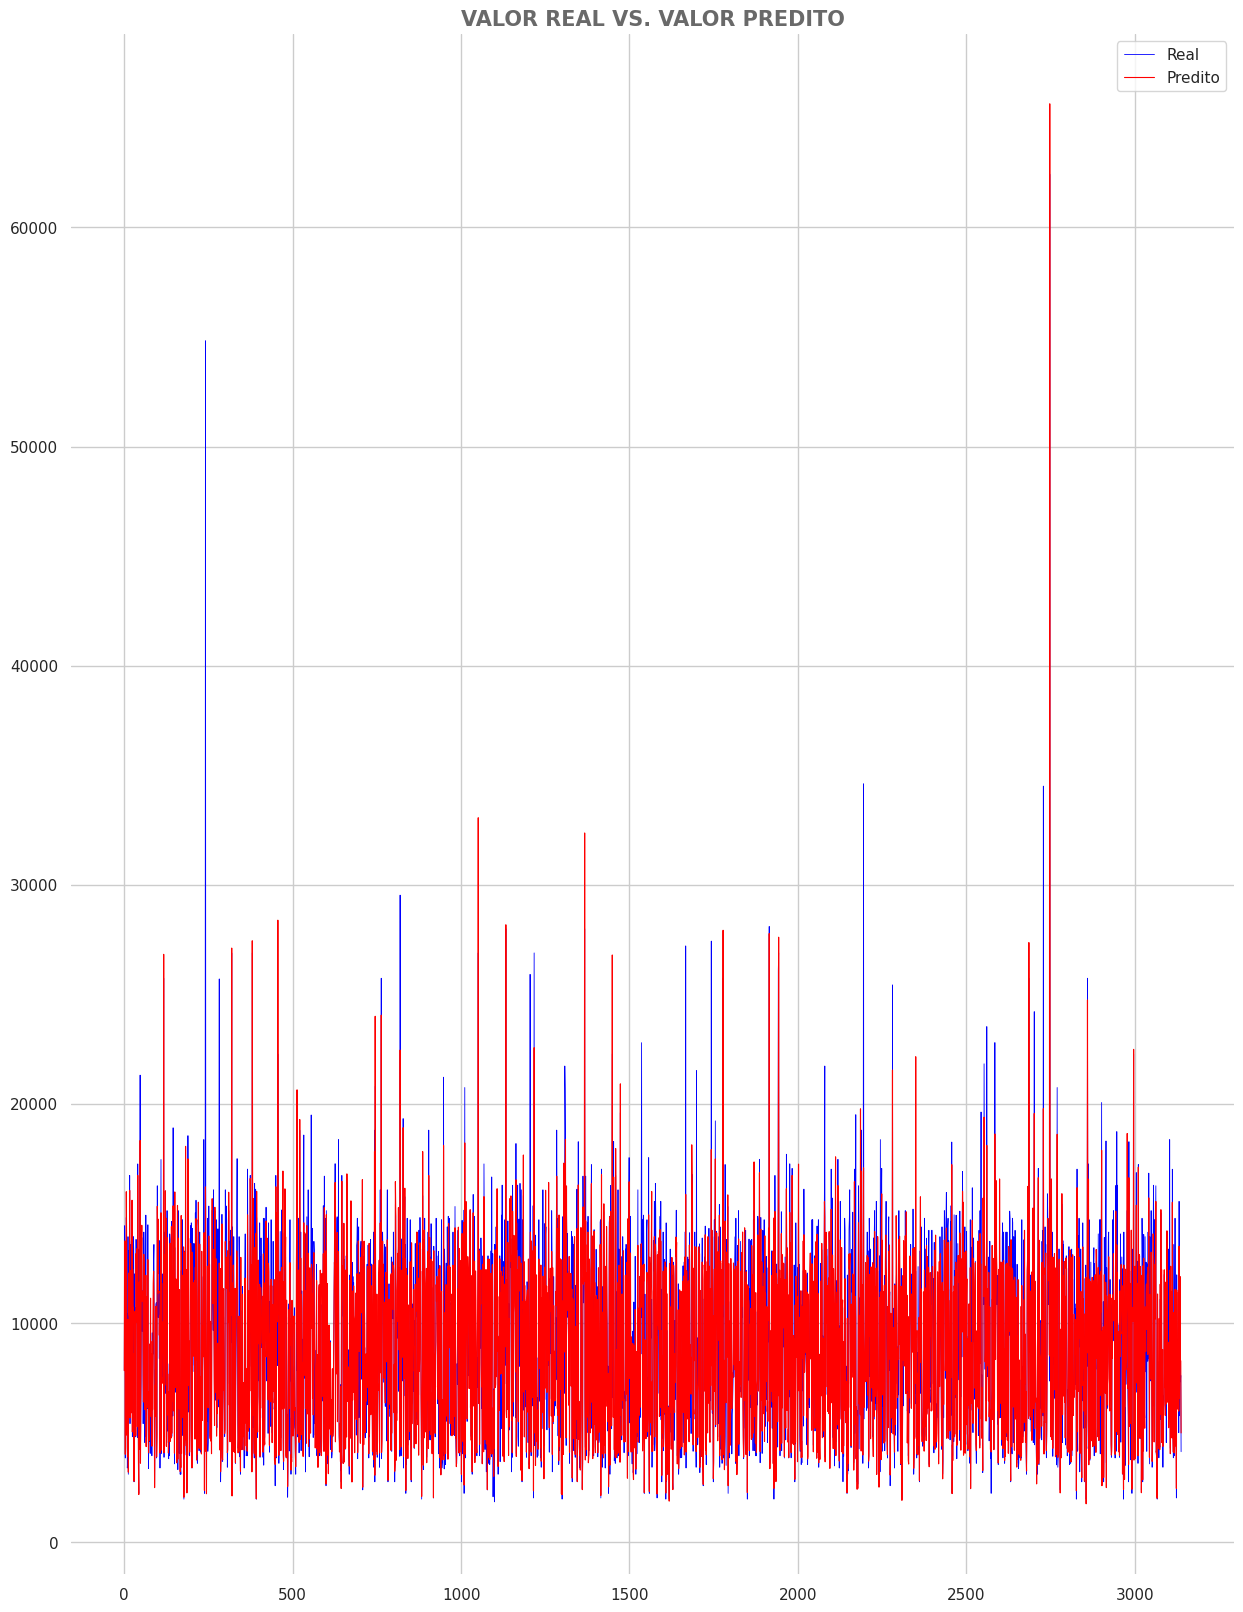

In [114]:
#Gráfico Valor Real vs. Valor Predito

#Plot
plt.figure(figsize=(15,20)) 
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, lw=0.6, color='blue', label='Real')
plt.plot(x_ax, Y_pred2, lw=0.8, color='red', label='Predito')
sns.despine(bottom = True, left = True)
plt.title('VALOR REAL VS. VALOR PREDITO', fontsize = 15, color ='dimgrey', fontweight = 'bold')
plt.legend()
plt.show()

**8.5 - Salvar o Modelo**

In [115]:
# Salvar o Modelo Treinado
modelo_xgbr2 = pickle.dumps(xgbr2)